In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [5]:
from pmdarima import auto_arima

In [6]:
df1 = pd.read_csv('./datasets/DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]

In [7]:
df2 = pd.read_csv('./datasets/TradeInventories.csv', index_col='Date', parse_dates=True)
df2.index.freq = 'MS'

## ARMA

<AxesSubplot:xlabel='Date'>

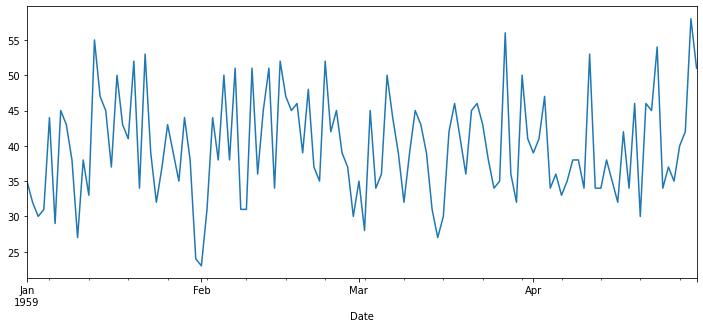

In [8]:
df1['Births'].plot(figsize=(12, 5))

In [13]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', '# Observations']
    out = pd.Series(result[0:4], index=labels)
    
    for key, val in result[4].items():
        out[f'Critical Value ({key})'] = val
        
    print(out.to_string())
    
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis')
        print('Reject the null hypothesis')
        print('Data has no unit root and is stationary')
        
    else:
        print('Weak evidence against the null hypothesis')
        print('Fail to reject the null hypothesis')
        print('Data has a unit root and is non-stationary')

In [14]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: 
ADF Test Statistic     -9.855384e+00
p-value                 4.373545e-17
# Lags Used             0.000000e+00
# Observations          1.190000e+02
Critical Value (1%)    -3.486535e+00
Critical Value (5%)    -2.886151e+00
Critical Value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [15]:
auto_arima(df1['Births'], seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                        SARIMAX   Log Likelihood                -409.745
Date:                Tue, 09 Feb 2021   AIC                            823.489
Time:                        12:34:19   BIC                            829.064
Sample:                             0   HQIC                           825.753
                                - 120                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     39.7833      0.687     57.896      0.000      38.437      41.130
sigma2        54.1197      8.319      6.506      0.000      37.815      70.424
===================================================================================
Ljung-Box (Q):                       44.41   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.29   Prob(JB):                         0.26
Heteroskedasticity (H):               0.80   Skew:                             0.26
Prob(H) (two-sided):                  0.48   Kurtosis:                         2.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
train = df1.iloc[:90]
test = df1.iloc[90:]

In [17]:
model = ARMA(train['Births'], order=(2, 2))

In [19]:
results = model.fit()

In [20]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Tue, 09 Feb 2021   AIC                            627.809
Time:                        12:37:31   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.500      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.800      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.556      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [21]:
start = len(train)
end = len(train) + len(test) - 1

In [22]:
predictions = results.predict(start, end).rename('ARMA 2,2 Predicitons')

In [23]:
test

,Births
Date,
1959-04-01,39
1959-04-02,41
1959-04-03,47
1959-04-04,34
1959-04-05,36
1959-04-06,33
1959-04-07,35
1959-04-08,38
1959-04-09,38


In [24]:
predictions

1959-04-01    39.982221
1959-04-02    39.992613
1959-04-03    39.809829
1959-04-04    39.848173
1959-04-05    39.761537
1959-04-06    39.794254
1959-04-07    39.750500
1959-04-08    39.772833
1959-04-09    39.749660
1959-04-10    39.763667
1959-04-11    39.750991
1959-04-12    39.759431
1959-04-13    39.752354
1959-04-14    39.757336
1959-04-15    39.753334
1959-04-16    39.756243
1959-04-17    39.753963
1959-04-18    39.755651
1959-04-19    39.754347
1959-04-20    39.755322
1959-04-21    39.754574
1959-04-22    39.755137
1959-04-23    39.754708
1959-04-24    39.755032
1959-04-25    39.754785
1959-04-26    39.754972
1959-04-27    39.754830
1959-04-28    39.754937
1959-04-29    39.754856
1959-04-30    39.754918
Freq: D, Name: ARMA 2,2 Predicitons, dtype: float64

<AxesSubplot:xlabel='Date'>

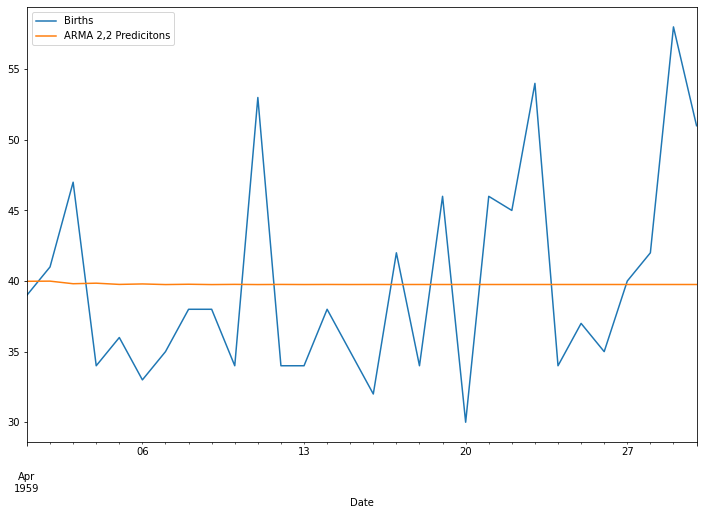

In [27]:
test['Births'].plot(figsize=(12, 8), legend=True)
predictions.plot(legend=True)

In [28]:
test.mean()

Births    39.833333
dtype: float64

In [29]:
predictions.mean()

39.777433616219376